<a href="https://colab.research.google.com/github/J-Dunham2021/STC510/blob/main/Dunham_Module3_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Altering the Crimestats CSV 
Data provided from two places:

Kaggle - https://www.kaggle.com/mariapushkareva/phoenix-crime-data?select=crimestat+%281%29.csv 

City of Phoenix - https://www.phoenixopendata.com/dataset/crime-data
utilizing various pandas and numpy functions.


Importing utilizing the pandas and numpy packages in Python.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below code manually allows you to yank the crimestats.csv from your downloads folder or another folder located locally.

In [9]:
from google.colab import files
files.upload()

Saving crimestat.csv to crimestat (1).csv


The below code allows downloading the file directly from your local.

In [ ]:
files.download('crimestat.csv')

This was the first attempt at downloading the crimestats.csv from the City of Phoenix website, however, there is an issue in Parsing where the data is formatted awkwardly in one of the fields "Expected 1 fields in line 21, saw 2."

In [ ]:
crime = pd.read_csv("https://www.phoenixopendata.com/dataset/crime-data/resource/0ce3411a-2fc6-4302-a33f-167f68608a20")

This was the second attempt at downloading the crimestats.csv from the Kaggle page using the pd.read_csv, it also produced a parsing error "Expected 1 fields in line 20 saw 2." Not sure how to resolve either since it appears nothing is wrong when the Excel file is looked at for the specific rows.

In [ ]:
crime1 = pd.read_csv("https://www.phoenixopendata.com/dataset/crime-data")

Even trying to get the website to read using the "engine="python"" produces an error at line 392 in the file: "Expected 1 fields in line 392, saw 2."

In [ ]:
crime = pd.read_csv("https://www.phoenixopendata.com/dataset/crime-data/resource/0ce3411a-2fc6-4302-a33f-167f68608a20", engine="python")

In an effort to salvage the project the file works from manually importing it directly from your local PC or Drive after being downloaded instead of extracted from either website previously mentioned, but you have to use the "error_bad_lines" to ignore the parsing error, although this ends up dropping some of your data frame inforamtion from line 392 through various intervals to 733. About 22 rows of data are "lost" due to having to use error_bad_lines.

In [10]:
crime1 = pd.read_csv("https://www.phoenixopendata.com/dataset/crime-data/resource/0ce3411a-2fc6-4302-a33f-167f68608a20", engine="python", error_bad_lines=False)

Skipping line 392: Expected 1 fields in line 392, saw 2
Skipping line 397: Expected 1 fields in line 397, saw 7
Skipping line 398: Expected 1 fields in line 398, saw 3
Skipping line 399: Expected 1 fields in line 399, saw 2
Skipping line 400: Expected 1 fields in line 400, saw 5
Skipping line 401: Expected 1 fields in line 401, saw 4
Skipping line 402: Expected 1 fields in line 402, saw 4
Skipping line 403: Expected 1 fields in line 403, saw 3
Skipping line 404: Expected 1 fields in line 404, saw 2
Skipping line 405: Expected 1 fields in line 405, saw 2
Skipping line 410: Expected 1 fields in line 410, saw 3
Skipping line 419: Expected 1 fields in line 419, saw 6
Skipping line 424: Expected 1 fields in line 424, saw 2
Skipping line 512: Expected 1 fields in line 512, saw 10
Skipping line 540: Expected 1 fields in line 540, saw 8
Skipping line 613: Expected 1 fields in line 613, saw 2
Skipping line 630: Expected 1 fields in line 630, saw 3
Skipping line 679: Expected 1 fields in line 67

Checking the length of the CSV file after having to use error_bad_lines.

In [8]:
len(crime)


368

Downloading directly from the City of Phoenix into your local machine and importing the file works despite obtaining a DtypeWarning there is no instance of rows being dropped like above.

In [14]:
crime = pd.read_csv("crimestat.csv")
crime.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


This second version of putting in the data frame for the crimstat.csv into the variable crime will not produce the warning mentioned above since we utilized the dtype instead of having pandas guess the dtype.

In [15]:
crime = pd.read_csv("crimestat.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crime.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE


This turns out to be massive file since the tail prints out all the way to row 342163....

In [16]:
crime.tail()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
342159,202100000133284,01/25/2021 22:31,NaN,BURGLARY,83XX N 19TH AVE,85021,APARTMENT
342160,202100000135588,01/25/2021 23:00,NaN,LARCENY-THEFT,14XX N 32ND ST,85008,PARKING LOT
342161,202100000133442,01/25/2021 23:00,NaN,DRUG OFFENSE,2XX S 44TH ST,85034,STREET / ROADWAY / SIDEWALK
342162,202100000133395,01/25/2021 23:15,NaN,AGGRAVATED ASSAULT,32XX E ROOSEVELT ST,85008,APARTMENT
342163,202180000799,01/25/2021 23:30,01/26/2021 10:00,LARCENY-THEFT,68XX N 17TH AVE,85015,PARKING LOT


**Assignment Notes**

You need to import this data, and make some sense of it. That might include some combination of:

1. Grouping crimes by location type or by zip code (or groups of zip codes).

2. Or, on the contrary, looking at types of crimes and where they are most common.

3. Would be good to know which areas have the fastest growing and shrinking crime rates.

Might even be worth grouping crimes by violent and non-violent?

I was curious by what kind of homes most incendences occurred and wanted to sort the values and do a value count.

In [26]:
crime.sort_values(by='PREMISE TYPE',ascending=True)

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
240113,201900001158283,07/07/2019 10:28,07/07/2019 10:28,AGGRAVATED ASSAULT,124XX N CAVE CREEK RD,85022,ABANDONED/CONDEMNED STRUCTURE
175284,201800001295591,07/22/2018 20:00,07/23/2018 12:00,RAPE,39XX N 3RD AVE,85013,ABANDONED/CONDEMNED STRUCTURE
212732,201900000262807,02/14/2019 14:43,02/14/2019 14:43,BURGLARY,91XX N CENTRAL AVE,85020,ABANDONED/CONDEMNED STRUCTURE
171593,201900000255640,07/01/2018 00:01,02/13/2019 11:13,BURGLARY,91XX N CENTRAL AVE,85020,ABANDONED/CONDEMNED STRUCTURE
305581,202000001065075,06/26/2020 17:58,06/26/2020 18:00,DRUG OFFENSE,92XX N 29TH AVE,85051,ABANDONED/CONDEMNED STRUCTURE
...,...,...,...,...,...,...,...
340793,202100000088751,01/18/2021 03:29,01/18/2021 05:00,ARSON,14XX E OSBORN RD,85014,NaN
341689,202100000120490,01/23/2021 00:00,NaN,ARSON,15XX E VAN BUREN ST,85006,NaN
341709,202100000117380,01/23/2021 01:23,01/23/2021 03:07,ARSON,15XX W MONROE ST,85007,NaN
341771,202100000119799,01/23/2021 13:20,01/23/2021 14:00,ARSON,48XX W CORONADO RD,85035,NaN


This was me double checking the data type of the columns in the data frame just incase I had to transform a variable.

In [33]:
crime.dtypes

INC NUMBER            object
OCCURRED ON           object
OCCURRED TO           object
UCR CRIME CATEGORY    object
100 BLOCK ADDR        object
ZIP                   object
PREMISE TYPE          object
dtype: object

Because it was severely annoying to try to pull value_counts from columns with whitespaces I took the liberty of removing the whitespaces from the column titles and replaced them with an underscore hoping value_counts would work.

In [37]:
crime.columns = crime.columns.str.replace(' ', '_') 
print(crime)

             INC_NUMBER        OCCURRED_ON  ...    ZIP                 PREMISE_TYPE
0       201600000052855  11/01/2015  00:00  ...  85029          SINGLE FAMILY HOUSE
1       201600000594484  11/01/2015  00:00  ...  85006          SINGLE FAMILY HOUSE
2       201500002102327  11/01/2015  00:00  ...  85014                    APARTMENT
3       201500002101405  11/01/2015  00:00  ...  85307          SINGLE FAMILY HOUSE
4       201500002102668  11/01/2015  00:00  ...  85043          SINGLE FAMILY HOUSE
...                 ...                ...  ...    ...                          ...
342159  202100000133284  01/25/2021  22:31  ...  85021                    APARTMENT
342160  202100000135588  01/25/2021  23:00  ...  85008                  PARKING LOT
342161  202100000133442  01/25/2021  23:00  ...  85034  STREET / ROADWAY / SIDEWALK
342162  202100000133395  01/25/2021  23:15  ...  85008                    APARTMENT
342163     202180000799  01/25/2021  23:30  ...  85015                  PARK

Here I wanted to sort the values by two variables rather than one and eventually do a value counts.

In [53]:
crime.sort_values(by=['UCR_CRIME_CATEGORY','PREMISE_TYPE'])

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
114829,201700001438721,08/17/2017 04:45,NaN,AGGRAVATED ASSAULT,28XX E THOMAS RD,85008,ABANDONED/CONDEMNED STRUCTURE
119341,201700001592053,09/10/2017 14:46,NaN,AGGRAVATED ASSAULT,27XX N 24TH ST,85006,ABANDONED/CONDEMNED STRUCTURE
131703,201700002024523,11/17/2017 05:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043,ABANDONED/CONDEMNED STRUCTURE
152140,201800000423680,03/10/2018 08:55,03/10/2018 08:57,AGGRAVATED ASSAULT,1XX S CENTRAL AVE,85004,ABANDONED/CONDEMNED STRUCTURE
160350,201800000740969,04/27/2018 18:25,04/27/2018 18:31,AGGRAVATED ASSAULT,7XX E APACHE ST,85004,ABANDONED/CONDEMNED STRUCTURE
...,...,...,...,...,...,...,...
161965,201800000798589,05/06/2018 18:46,NaN,ROBBERY,N 83RD AVE & W EARLL DR,85033,NaN
162038,201800000800878,05/07/2018 06:07,05/07/2018 06:07,ROBBERY,E WELDON AVE & N 3RD ST,85012,NaN
171626,201800001152864,07/01/2018 05:30,07/01/2018 06:07,ROBBERY,22XX W INDIAN SCHOOL RD,85015,NaN
250426,201900001512667,09/01/2019 07:00,09/01/2019 07:00,ROBBERY,18XX W MONTEBELLO AVE,85015,NaN


In [56]:
crime.UCR_CRIME_CATEGORY.value_counts

<bound method IndexOpsMixin.value_counts of 0         MOTOR VEHICLE THEFT
1                        RAPE
2               LARCENY-THEFT
3         MOTOR VEHICLE THEFT
4         MOTOR VEHICLE THEFT
                 ...         
342159               BURGLARY
342160          LARCENY-THEFT
342161           DRUG OFFENSE
342162     AGGRAVATED ASSAULT
342163          LARCENY-THEFT
Name: UCR_CRIME_CATEGORY, Length: 342164, dtype: object>

I wanted to do a dataframe that would group by the UCR crime category since I was curious what type of incidents occurr the most. Then I constructed another frame by adding a secondary variable to see if this altered the output based on the second variable.

In [58]:
gcrime = crime.groupby(['UCR_CRIME_CATEGORY'])
type(gcrime)

pandas.core.groupby.generic.DataFrameGroupBy

In [59]:
ncrime = crime.groupby(['UCR_CRIME_CATEGORY', 'PREMISE_TYPE'])
ncrime

Checking the data frame column headers.

In [69]:
for col in crime.columns: 
    print(col) 

INC_NUMBER
OCCURRED_ON
OCCURRED_TO
UCR_CRIME_CATEGORY
100_BLOCK_ADDR
ZIP
PREMISE_TYPE


Changing the ZIP variable from character to float since it is a bunch of numbers.

In [77]:
crime['ZIP'] = crime['ZIP'].astype(float)

I'm not sure why value counts isn't working for a specific column of the crim dataframe, but it works after doing a groupby.

In [93]:
crime['UCR_CRIME_CATEGORY'].value_counts

<bound method IndexOpsMixin.value_counts of 0         MOTOR VEHICLE THEFT
1                        RAPE
2               LARCENY-THEFT
3         MOTOR VEHICLE THEFT
4         MOTOR VEHICLE THEFT
                 ...         
342159               BURGLARY
342160          LARCENY-THEFT
342161           DRUG OFFENSE
342162     AGGRAVATED ASSAULT
342163          LARCENY-THEFT
Name: UCR_CRIME_CATEGORY, Length: 342164, dtype: object>

I did the same groupby as above but this time I added a counts column since it might help in a better graphical display of numbers and since value_counts decided to not work correctly above.

In [128]:
group_counts_crime = crime.groupby(['UCR_CRIME_CATEGORY', 'PREMISE_TYPE']).size().reset_index(name='counts')
group_counts_crime

,UCR_CRIME_CATEGORY,PREMISE_TYPE,counts
0,AGGRAVATED ASSAULT,ABANDONED/CONDEMNED STRUCTURE,12
1,AGGRAVATED ASSAULT,ADULT ONLY STORE / MOVIE,11
2,AGGRAVATED ASSAULT,AIRPORT,32
3,AGGRAVATED ASSAULT,ALLEY,56
4,AGGRAVATED ASSAULT,AMUSEMENT PARK,3
...,...,...,...
667,ROBBERY,THEATRE,1
668,ROBBERY,TRAIN STATION,3
669,ROBBERY,UNKNOWN,14
670,ROBBERY,VEHICLE,620


##**WARNING** 

This plot will take a long time to load, but it looks great and displays a lot of information, it could be categorized down but it provides a great "general appearance" for the crime data.

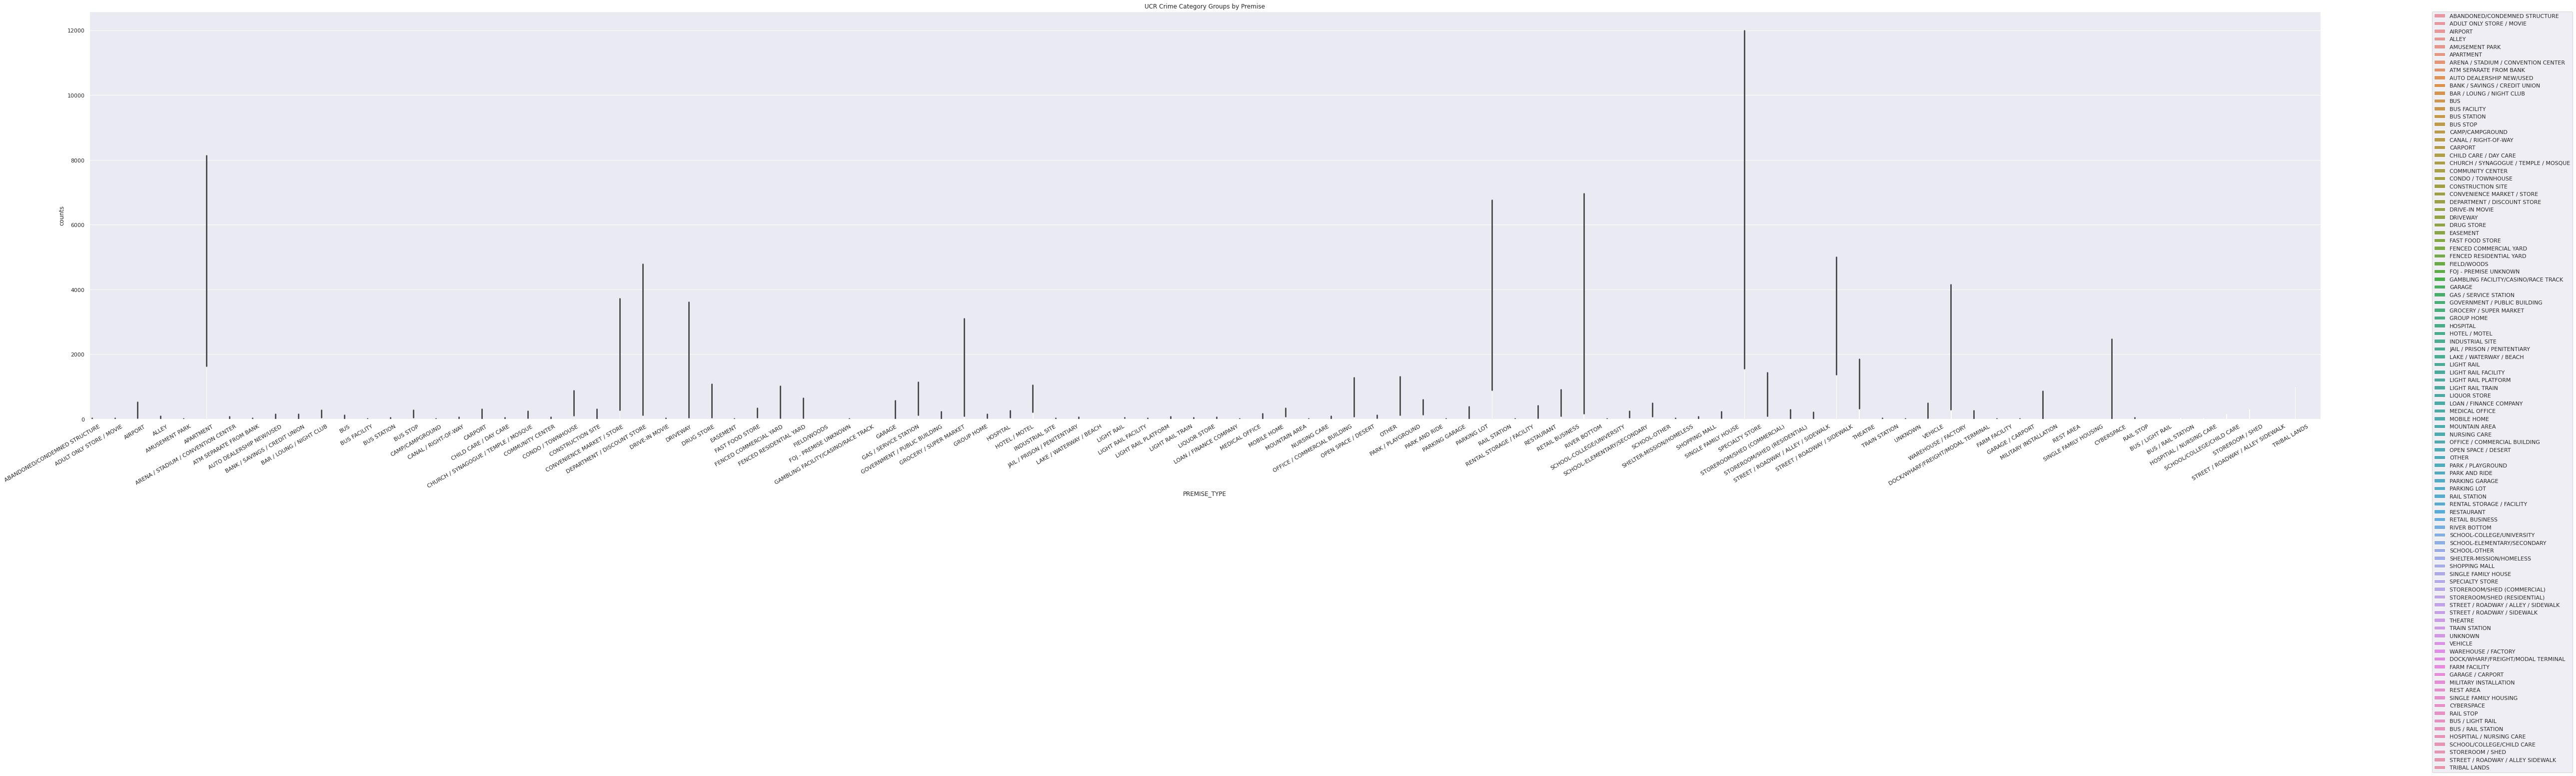

In [149]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(80,15))
crime_plot = sns.barplot(data=group_counts_crime,x='PREMISE_TYPE', y='counts', hue='PREMISE_TYPE')
crime_plot.set_xticklabels(crime_plot.get_xticklabels(), rotation=30, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("UCR Crime Category Groups by Premise")
#plt.tight_layout()
plt.show()


In [126]:
ncrime['UCR_CRIME_CATEGORY'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f238045aeb8>>

I decided it would be interesting to focus on two different UCR_CRIME_CATEGORY after grouping by Premise type and the crime category so I decided to isolate two instances of the UCR "RAPE" category by where it occurred or "Premise_TYPE" and combine the results into a single dataframe for graphing.

In [96]:
rape = gcrime.get_group('RAPE')
rape

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
7,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019.0,HOSPITAL
37,201500002133436,11/01/2015 04:00,11/01/2015 04:05,RAPE,76XX W WHITTON AVE,85033.0,SINGLE FAMILY HOUSE
56,201500002108029,11/01/2015 09:00,NaN,RAPE,42XX W MULBERRY DR,85019.0,SINGLE FAMILY HOUSE
63,201600000410761,11/01/2015 10:00,11/01/2015 22:00,RAPE,68XX W INDIAN SCHOOL RD,85033.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
341742,202100000121479,01/23/2021 09:00,01/23/2021 19:30,RAPE,200XX N 23RD AVE,85027.0,APARTMENT
341858,202100000126202,01/23/2021 23:00,01/24/2021 19:28,RAPE,40XX W SAN MIGUEL AVE,85019.0,SINGLE FAMILY HOUSE
342015,202100000132537,01/25/2021 00:00,NaN,RAPE,31XX N 7TH AVE,85013.0,VEHICLE
342022,202100000129004,01/25/2021 00:00,NaN,RAPE,84XX S 47TH LN,85339.0,SCHOOL-ELEMENTARY/SECONDARY


In [118]:
s_home_rape = ncrime.get_group(('RAPE', 'SINGLE FAMILY HOUSE'))
s_home_rape.count()

INC_NUMBER            1502
OCCURRED_ON           1500
OCCURRED_TO           1068
UCR_CRIME_CATEGORY    1502
100_BLOCK_ADDR        1502
ZIP                   1502
PREMISE_TYPE          1502
dtype: int64

In [119]:
a_home_rape = ncrime.get_group(('RAPE', 'APARTMENT'))
a_home_rape.count()

INC_NUMBER            1299
OCCURRED_ON           1298
OCCURRED_TO            939
UCR_CRIME_CATEGORY    1299
100_BLOCK_ADDR        1299
ZIP                   1298
PREMISE_TYPE          1299
dtype: int64

Using vertical_stack I concatenated the two RAPE dataframes into one below.

In [107]:
vertical_stack = pd.concat([s_home_rape, a_home_rape], axis=0)

# Place the DataFrames side by side
horizontal_stack = pd.concat([s_home_rape, a_home_rape], axis=1)

In [104]:
vertical_stack

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
37,201500002133436,11/01/2015 04:00,11/01/2015 04:05,RAPE,76XX W WHITTON AVE,85033.0,SINGLE FAMILY HOUSE
56,201500002108029,11/01/2015 09:00,NaN,RAPE,42XX W MULBERRY DR,85019.0,SINGLE FAMILY HOUSE
63,201600000410761,11/01/2015 10:00,11/01/2015 22:00,RAPE,68XX W INDIAN SCHOOL RD,85033.0,SINGLE FAMILY HOUSE
342,201500002117953,11/03/2015 03:00,11/03/2015 07:00,RAPE,81XX N 40TH AVE,85051.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
340809,202100000089233,01/18/2021 08:37,01/18/2021 08:37,RAPE,21XX W CAMPBELL AVE,85015.0,APARTMENT
341436,202100000120216,01/21/2021 18:00,01/22/2021 03:00,RAPE,204XX N 7TH ST,85024.0,APARTMENT
341500,202100000112271,01/22/2021 00:00,01/22/2021 06:30,RAPE,30XX W YORKSHIRE DR,85027.0,APARTMENT
341737,202100000117888,01/23/2021 07:27,NaN,RAPE,21XX W NORTHERN AVE,85021.0,APARTMENT


I wouldn't recommend the horizontal stack for merging the two groupby data frames that look at the "RAPE" category, it makes it a bit of mess to look at.

In [ ]:
horizontal_stack #do not use

Out of boredom, below I decided to use two different seaborn graphs to see how the RAPE category based on PREMISE TYPE would turn out. It appears you're not much safer in a single family house than you are in an apartment. My main conclusion is that there "might not be enough data" since it isn't mentioned how many individuals are residing in the "Single family home" at the time of the attack, not sure if that matters though.

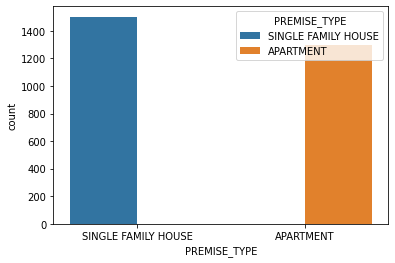

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=vertical_stack,x='PREMISE_TYPE',hue='PREMISE_TYPE')

This is apparently a "categorical plot" not much different than the previous but it's likely missing some components for its presentation.

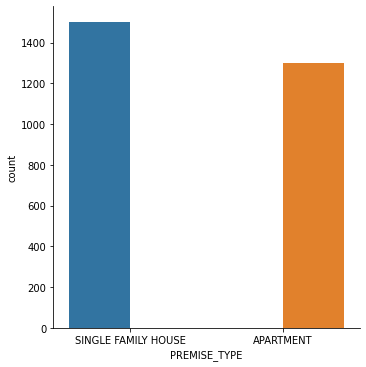

<Figure size 1080x864 with 0 Axes>

In [125]:
sns.catplot(data=vertical_stack,kind='count',x='PREMISE_TYPE',hue='PREMISE_TYPE')
plt.figure(figsize=(15, 12))

plt.show()

From my curiosity I aggregated the crime data based on the UCR crime category and the premise type and then isolated two premise types based on the UCR crime category of "RAPE" since my family often warned me about living by myself. This does not get my hopes up, but it is probably very different based on location. Regardless I guess I should start carrying pepper spray and have a home security system when I move out.